In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('data_science_job.csv')

In [6]:
df


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [12]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
499,0.624,Full time course,Graduate,5.0,8.0
5806,0.920,Full time course,High School,11.0,44.0
8469,0.827,no_enrollment,High School,6.0,21.0
11005,0.926,no_enrollment,Graduate,14.0,32.0
9957,0.647,Full time course,Masters,4.0,26.0


In [16]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [18]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

<function matplotlib.pyplot.show(close=None, block=None)>

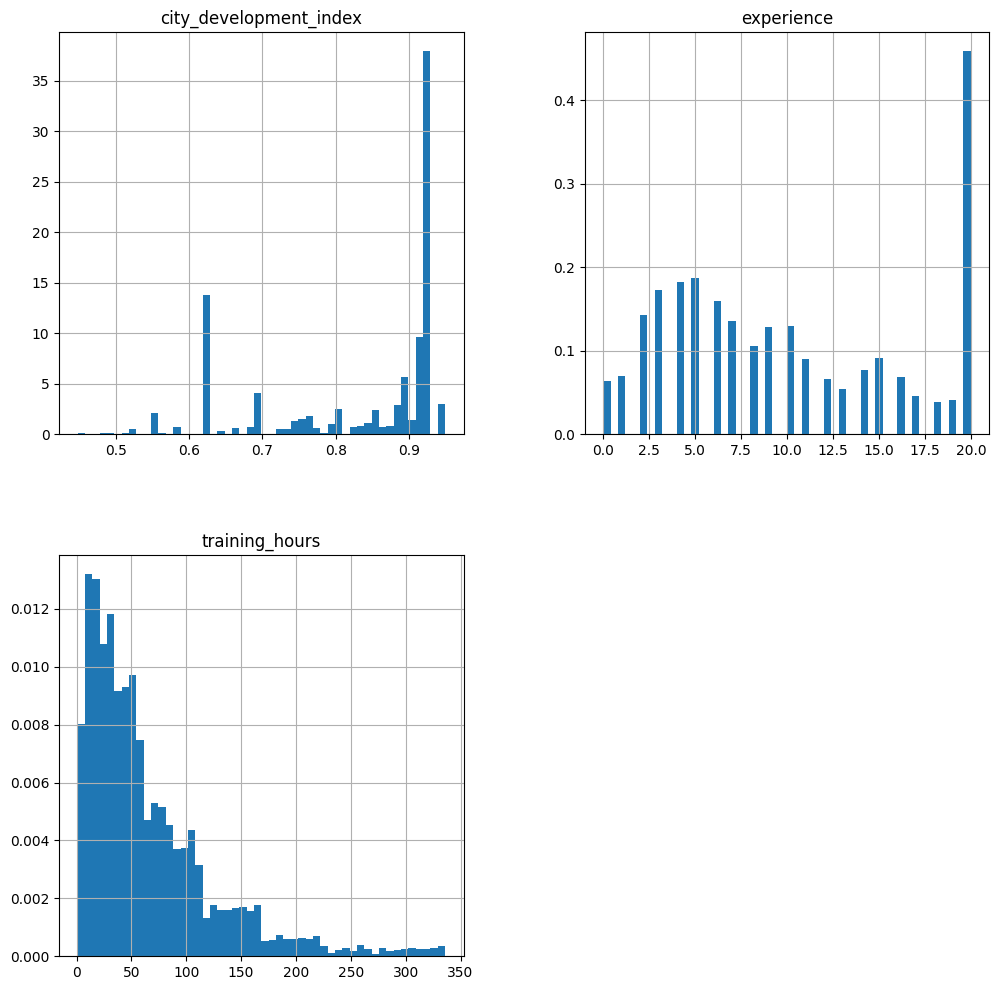

In [20]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show

<AxesSubplot: >

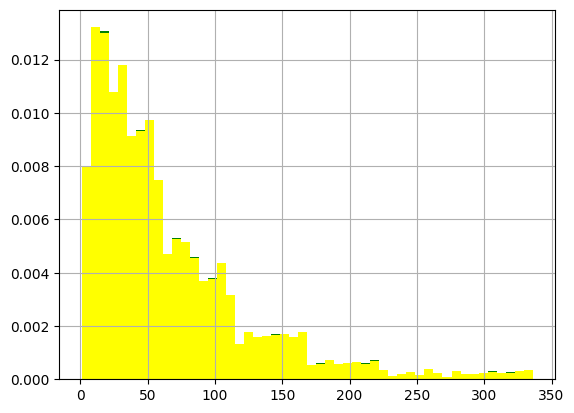

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].hist(bins=50,ax=ax,density=True,color='green')
new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='yellow')

<AxesSubplot: ylabel='Density'>

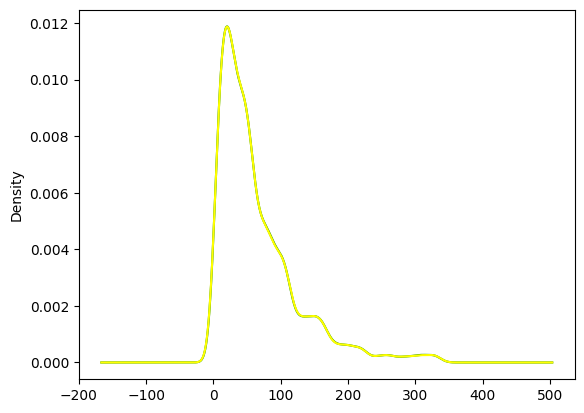

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].plot.density(color='green')
new_df['training_hours'].plot.density(color='yellow')

<function matplotlib.pyplot.show(close=None, block=None)>

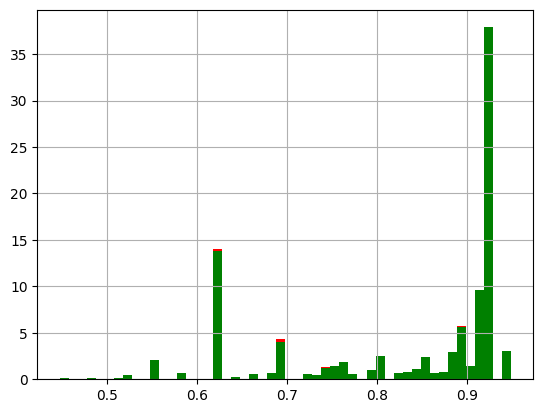

In [39]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')
new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='green')
plt.show

<AxesSubplot: ylabel='Density'>

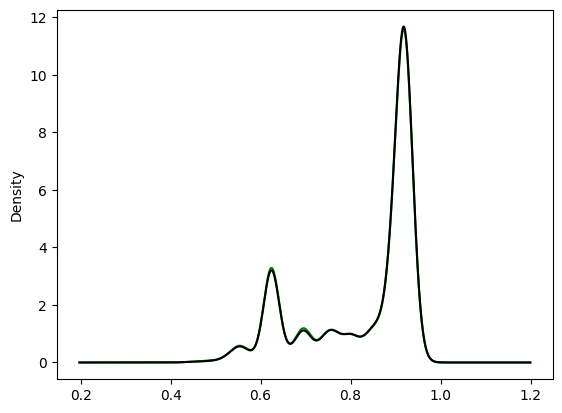

In [42]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['city_development_index'].plot.density(color='green')
new_df['city_development_index'].plot.density(color='black')

In [49]:
temp=pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)
temp.columns=['original','cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [54]:
temp=pd.concat([
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
],axis=1)
temp.columns=['original','cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [55]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
